<a href="https://colab.research.google.com/github/yulishadian/Image-Classification_270-268/blob/main/Image_Classification_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [24]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/Tugas Besar ML/"

In [25]:
%cd "/content/gdrive/MyDrive/Tugas Besar ML"

/content/gdrive/MyDrive/Tugas Besar ML


In [26]:
!kaggle datasets download -d alxmamaev/flowers-recognition

 96% 216M/225M [00:01<00:00, 108MB/s] 
100% 225M/225M [00:02<00:00, 114MB/s]


# Preprocessing

In [27]:
!unzip "/content/gdrive/My Drive/Tugas Besar ML/flowers-recognition.zip" -d "/content/gdrive/My Drive/Tugas Besar ML"

Archive:  /content/gdrive/My Drive/Tugas Besar ML/flowers-recognition.zip
  inflating: /content/gdrive/My Drive/Tugas Besar ML/flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: /content/gdrive/My Drive/Tugas Besar ML/flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: /content/gdrive/My Drive/Tugas Besar ML/flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: /content/gdrive/My Drive/Tugas Besar ML/flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: /content/gdrive/My Drive/Tugas Besar ML/flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: /content/gdrive/My Drive/Tugas Besar ML/flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: /content/gdrive/My Drive/Tugas Besar ML/flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: /content/gdrive/My Drive/Tugas Besar ML/flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: /content/gdrive/My Drive/Tugas Besar ML/flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: /content/gdrive/My Drive/Tugas Besar ML/flow

In [28]:
!ls

flowers  Flowers  flowers-recognition.zip  kaggle.json


In [29]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import os
from keras import layers,models

In [30]:
mypath= 'flowers/'

In [31]:
file_name = []
tag = []
full_path = []
for path, subdirs, files in os.walk(mypath):
    for name in files:
        full_path.append(os.path.join(path, name)) 
        tag.append(path.split('/')[-1])        
        file_name.append(name)

In [32]:
import pandas as pd

# memasukan variabel yang sudah dikumpulkan pada looping di atas menjadi sebuah dataframe agar rapih
df = pd.DataFrame({"path":full_path,'file_name':file_name,"tag":tag})
df.groupby(['tag']).size()

tag
daisy         764
dandelion    1052
rose          784
sunflower     733
tulip         984
dtype: int64

In [33]:
#cek sample datanya
df.head()

,path,file_name,tag
0,flowers/daisy/100080576_f52e8ee070_n.jpg,100080576_f52e8ee070_n.jpg,daisy
1,flowers/daisy/10140303196_b88d3d6cec.jpg,10140303196_b88d3d6cec.jpg,daisy
2,flowers/daisy/10172379554_b296050f82_n.jpg,10172379554_b296050f82_n.jpg,daisy
3,flowers/daisy/10172567486_2748826a8b.jpg,10172567486_2748826a8b.jpg,daisy
4,flowers/daisy/10172636503_21bededa75_n.jpg,10172636503_21bededa75_n.jpg,daisy


In [34]:
#load library untuk train test split
from sklearn.model_selection import train_test_split

In [35]:
#variabel yang digunakan pada pemisahan data ini
X= df['path']
y= df['tag']

In [36]:
# split dataset awal menjadi data train dan test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=300)

In [ ]:
# Normalisasi dataset
print("Data sebelum di-normalisasi ", train_data[0][0][0])

x_train = train_data.astype('float32') / 255.0
x_test = test_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_train[0][0][0])

In [37]:
# kemudian data test dibagi menjadi 2 sehingga menjadi data test dan data validation.
X_test, X_val, y_test, y_val = train_test_split(
    X_test, y_test, test_size=0.5, random_state=100)

In [38]:
# menyatukan kedalam masing-masing dataframe

df_tr = pd.DataFrame({'path':X_train
              ,'tag':y_train
             ,'set':'train'})

df_te = pd.DataFrame({'path':X_test
              ,'tag':y_test
             ,'set':'test'})

df_val = pd.DataFrame({'path':X_val
              ,'tag':y_val
             ,'set':'validation'})

In [39]:
print('train size', len(df_tr))
print('val size', len(df_te))
print('test size', len(df_val))

train size 3453
val size 432
test size 432


In [40]:
# melihat proporsi pada masing masing set apakah sudah ok atau masih ada yang ingin diubah
df_all = df_tr.append([df_te,df_val]).reset_index(drop=1)\

print('===================================================== \n')
print(df_all.groupby(['set','tag']).size(),'\n')

print('===================================================== \n')

#cek sample datanya
df_all.sample(3)


set         tag      
test        daisy         79
            dandelion    112
            rose          86
            sunflower     67
            tulip         88
train       daisy        608
            dandelion    834
            rose         614
            sunflower    602
            tulip        795
validation  daisy         77
            dandelion    106
            rose          84
            sunflower     64
            tulip        101
dtype: int64 




,path,tag,set
1933,flowers/dandelion/6954604340_d3223ed296_m.jpg,dandelion,train
2508,flowers/tulip/6958342976_a4a9483488_n.jpg,tulip,train
4023,flowers/daisy/4131565290_0585c4dd5a_n.jpg,daisy,validation


In [41]:
train_path = os.path.join("/content/gdrive/MyDrive/Tugas Besar ML/flowers")
classes = os.listdir(train_path)

In [42]:
train_gen = ImageDataGenerator(
    rescale = 1./255.,
    horizontal_flip = True,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2
)

train_data = train_gen.flow_from_directory(
    train_path, 
    target_size=(150, 150),
    batch_size = 64, 
    class_mode = "categorical" ,
    classes  = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip'],
    shuffle = True,
)

Found 4317 images belonging to 5 classes.


(64, 150, 150, 3)


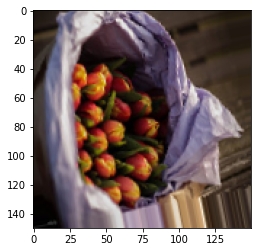

In [43]:
x, y = next(train_data)
print(x.shape)
plt.imshow(x[0])

In [44]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

In [45]:
model.compile(loss = "categorical_crossentropy", metrics = "acc", optimizer='adam')
history = model.fit(train_data, epochs = 10 )

Epoch 1/10
68/68 [==============================] - 190s 3s/step - loss: 1.4132 - acc: 0.4024
Epoch 2/10
68/68 [==============================] - 189s 3s/step - loss: 1.1050 - acc: 0.5499
Epoch 3/10
68/68 [==============================] - 189s 3s/step - loss: 0.9807 - acc: 0.6162
Epoch 4/10
68/68 [==============================] - 190s 3s/step - loss: 0.9172 - acc: 0.6372
Epoch 5/10
68/68 [==============================] - 188s 3s/step - loss: 0.8655 - acc: 0.6576
Epoch 6/10
68/68 [==============================] - 188s 3s/step - loss: 0.8020 - acc: 0.6824
Epoch 7/10
68/68 [==============================] - 188s 3s/step - loss: 0.7798 - acc: 0.7084
Epoch 8/10
68/68 [==============================] - 188s 3s/step - loss: 0.7455 - acc: 0.7148
Epoch 9/10
68/68 [==============================] - 186s 3s/step - loss: 0.7591 - acc: 0.7100
Epoch 10/10
68/68 [==============================] - 186s 3s/step - loss: 0.7337 - acc: 0.7202


In [47]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.AveragePooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.AveragePooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.AveragePooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

In [ ]:
model.compile(loss = "categorical_crossentropy", metrics = "acc", optimizer='adam')
history_2 = model.fit(train_data, epochs = 10 )

Epoch 1/10
68/68 [==============================] - 175s 3s/step - loss: 1.4011 - acc: 0.4172
Epoch 2/10
68/68 [==============================] - 176s 3s/step - loss: 1.1503 - acc: 0.5418
Epoch 3/10
68/68 [==============================] - 173s 3s/step - loss: 1.0229 - acc: 0.6004
Epoch 4/10
68/68 [==============================] - 172s 3s/step - loss: 0.9675 - acc: 0.6176
Epoch 5/10
68/68 [==============================] - 173s 3s/step - loss: 0.9094 - acc: 0.6535
Epoch 6/10
54/68 [======================>.......] - ETA: 35s - loss: 0.8734 - acc: 0.6577

In [ ]:
from keras.models import model_from_json
target_dir = "/content/gdrive/MyDrive/Tugas Besar ML/Model1"

# simpan history model pertama
history_dict = history_.history
json.dump(history_dict, open(target_dir + '/history_pertama.json', 'w'))

# simpan model pertama dan weight-nya
model.save(target_dir + '/model_pertama.h5')
model.save_weights(target_dir + '/model_pertama_weights.h5')

In [ ]:
from keras.models import model_from_json
target_dir = "/content/gdrive/MyDrive/Tugas Besar ML/Model2"

# simpan history model pertama
history_dict = history_2.history
json.dump(history_dict, open(target_dir + '/history_kedua.json', 'w'))

# simpan model pertama dan weight-nya
model.save(target_dir + '/model_kedua.h5')
model.save_weights(target_dir + '/model_kedua_weights.h5')